##Importamos las librerias necesarias

In [92]:
import pandas as pd #cargar los daots
import numpy as np #operaciones matriciales
import matplotlib.pyplot as plt #graficar
import nltk  as nltk#libreria de procesamiento de lenguaje natural
#import scikit learn tfidvector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [96]:
#leemos el csv
jobs = pd.read_csv('jobskills.csv',encoding='utf-8')

In [97]:
#Separamos en una lista de valores los skills
jobs['skills'] = jobs['skills'].str.split(',')
jobs['job'] = jobs['job'].str.split(',')

In [98]:
#Limpiamos los datos, pasamos a minúsculas, quitamos espacios al inicio y final y quitamos duplicados if skill is list and not float
#DELETE EMPTY SKILLS
jobs['skills'] = jobs['skills'].apply(lambda x: [i.lower().strip() for i in x] if type(x) is list else x)
jobs.dropna()
#delete if job skills list and non float is empty or nan 
jobs = jobs[jobs['skills'].map(lambda d: len(d) > 0 if type(d) is list else False)]
#remove duplicates
jobs['skills'] = jobs['skills'].apply(lambda x: list(dict.fromkeys(x) ) if type(x) is list else x)


In [99]:
jobs

,job,skills,uniq_id
0,[Information Security Engineer],"[linux, network monitoring, incident response,...",8aec88cba08d53da65ab99cf20f6f9d9
1,[Business Solutions Architect],"[enterprise solutions architecture, business i...",46baa1f69ac07779274bcd90b85d9a72
2,[DevOps Engineer],"[configuration management, developer, linux, m...",45efa1f6bc65acc32bbbb953a1ed13b7
3,[SAP FICO Architect],"[fico, ar, ap, asset management, haha]",e0ac9d926dda5e95162ef05adea7318c
4,[Network Engineer],"[cisco, dns, http, networking, network enginee...",e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...
21983,[Web Designer],"[ui/ux mobile apps, interaction design, digita...",86e27ce6b7e631e55d69d142c7d43df2
21984,[Senior Front End Web Developer - Full Time at...,"[javascript, html5, css3, bootstrap, ajax, rea...",4287c7ee3317ccf1edd76e238cf8e584
21985,[QA Analyst],"[sdlc, alm, sql, t-sql, redgate, team foundati...",d7512f0181d69f83f96db38cd77a4d08
21986,[Tech Lead-Full Stack],"[python, ruby, go, clojure, java, nosql-databa...",ec375268b494b3bcbed1635d64226112


In [100]:
vocabulary1 = nltk.FreqDist()

for skill in jobs['skills']:
    if type(skill) is list:
        # delete empty skills
        if len(skill) > 0:
            vocabulary1.update(skill)
    


Obtenemos el número de palabra más repetidas y lo graficamos

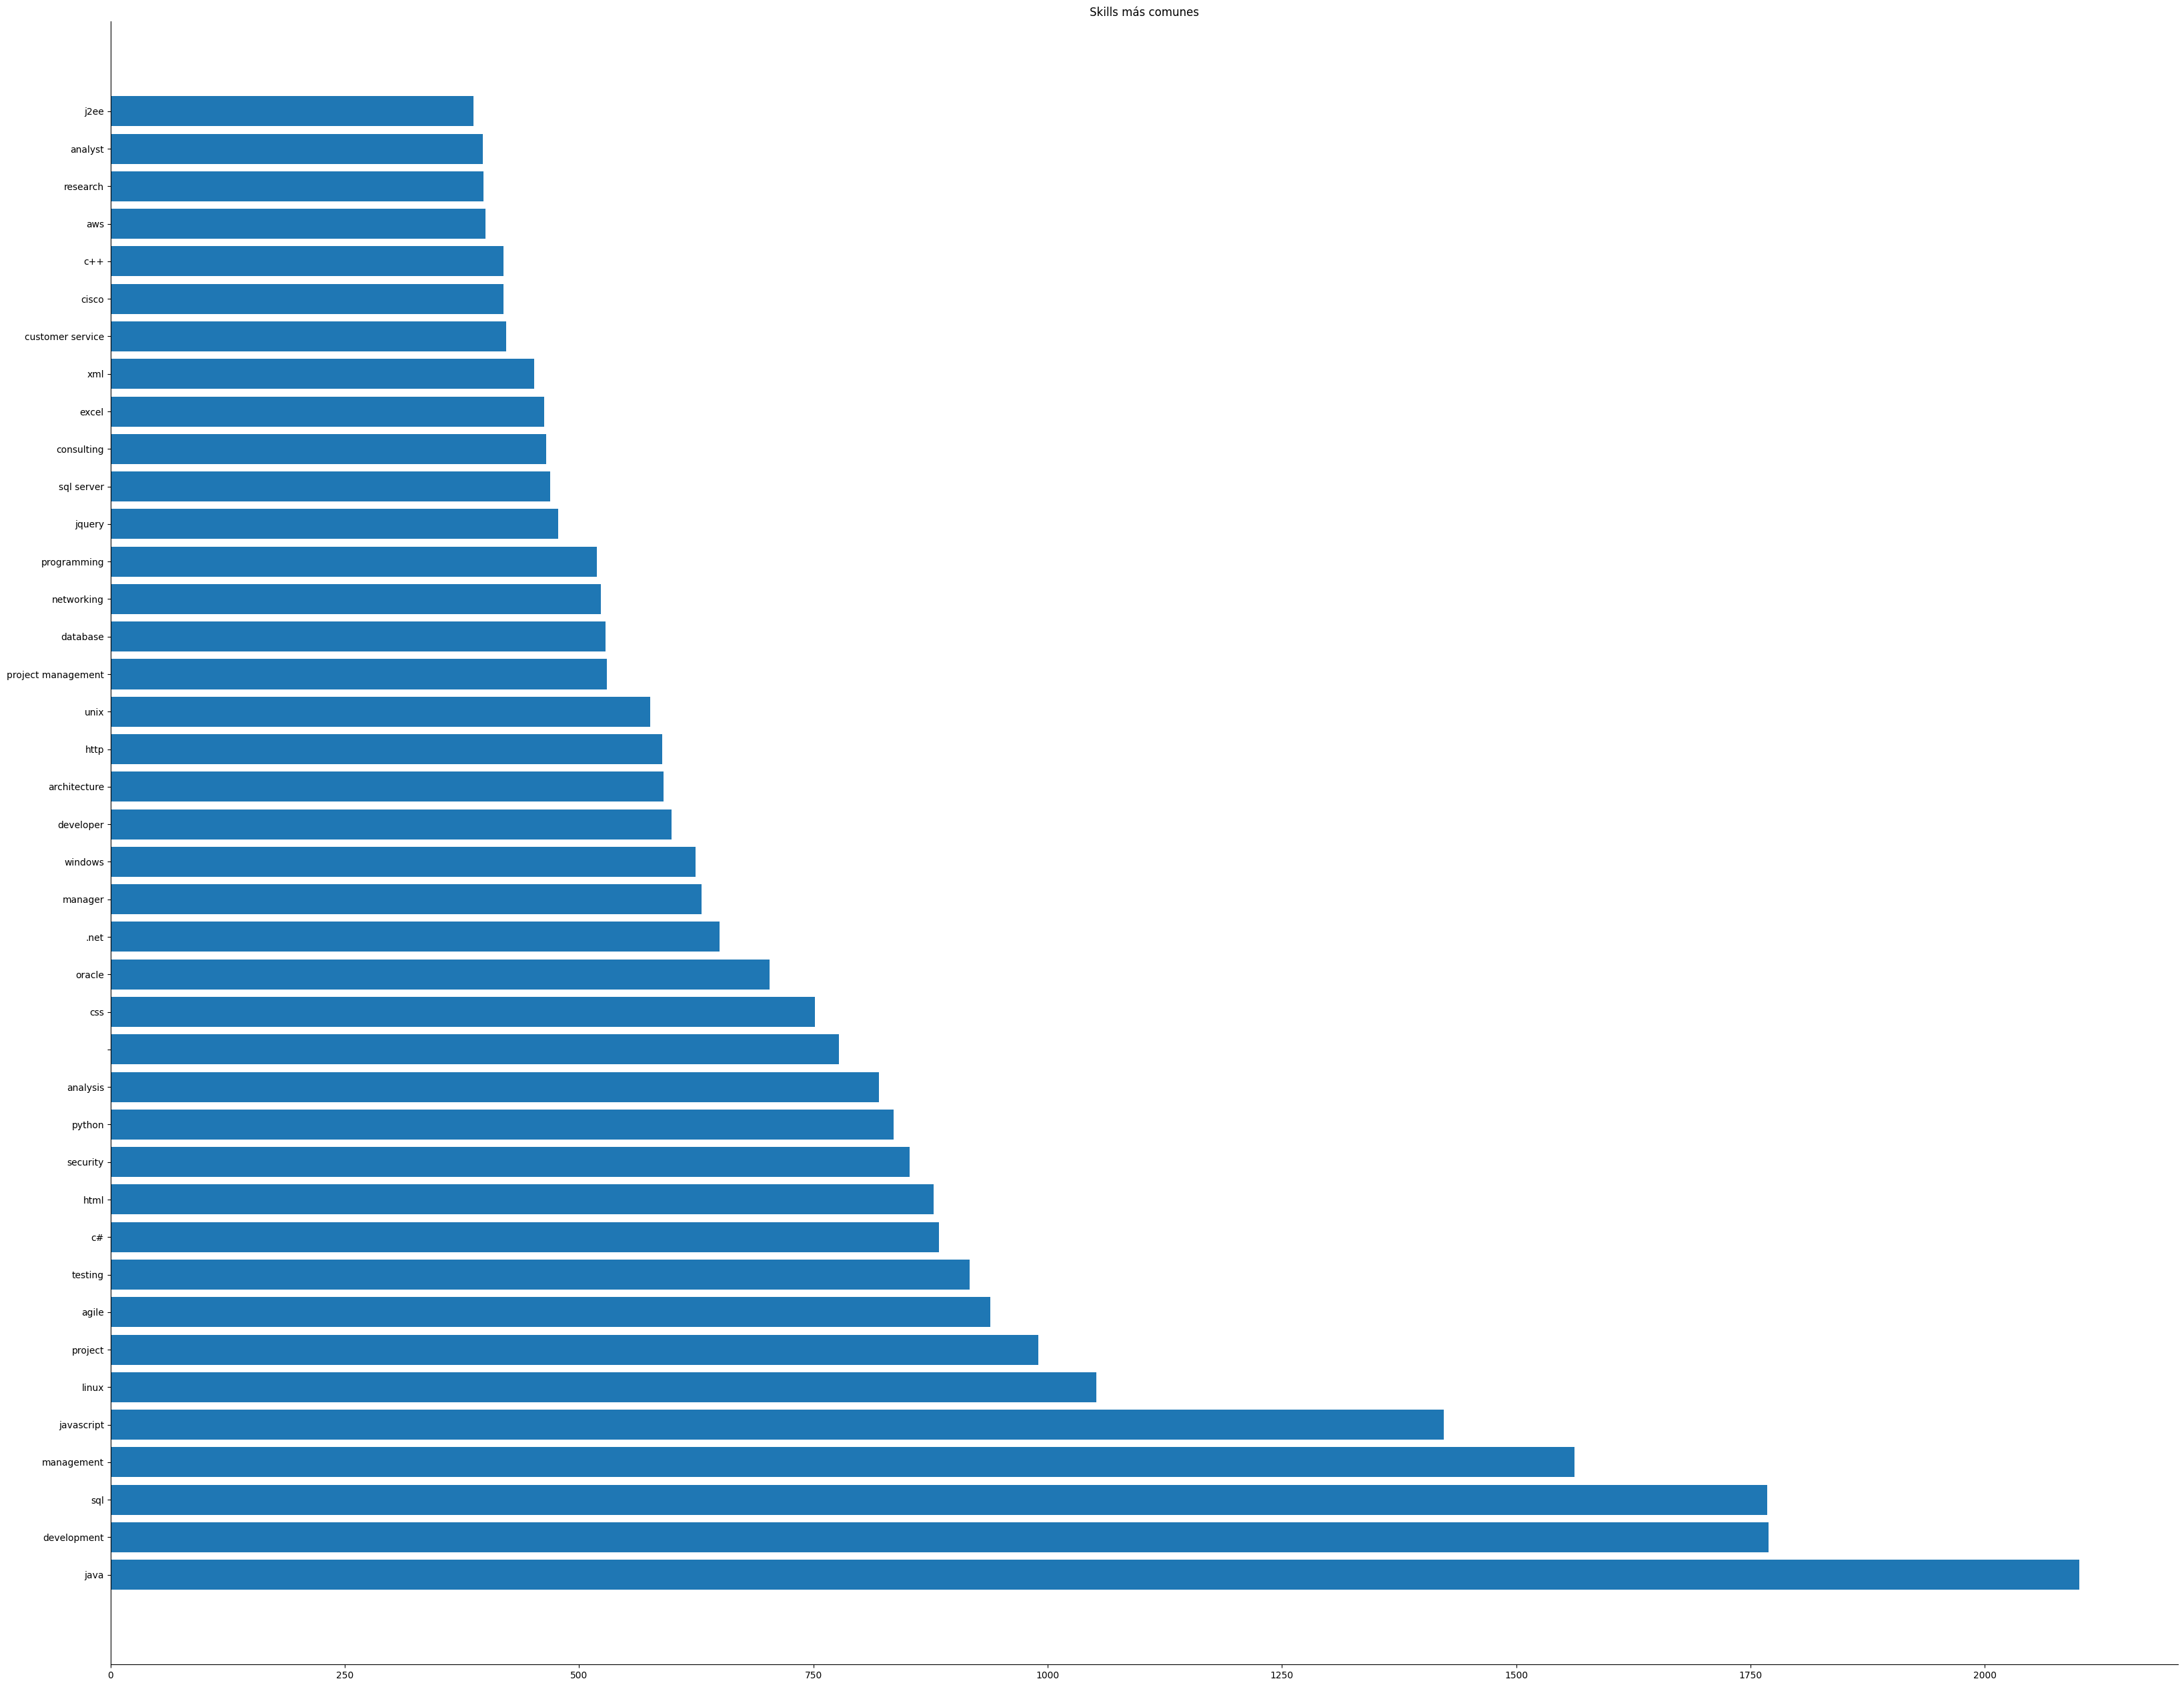

In [101]:
#plot all skills as histogram
fig , ax = plt.subplots(figsize=(40,32))
plt.barh([x[0] for x in vocabulary1.most_common(40)],[x[1] for x in vocabulary1.most_common(40)], label='skills')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('# Skills')
plt.title('Skills más comunes')
plt.show()


In [102]:
# empezamos a vectorizar la lista
#create an object for TfidVectorizer
vectorizer = TfidfVectorizer()
tfidf_skills = vectorizer.fit_transform(jobs['skills'].apply(lambda x: ' '.join(x) if type(x) is list else x))




In [105]:
# save the dataframe as csv
jobs.to_csv('jobskills_parsed.csv', index=False)

In [129]:
# cosine similarity matrix
#similarity_matrix = cosine_similarity(skills,tfidf_skills)


In [147]:
def recommend(listOfSkills):
    #create a list of skills
    skills = listOfSkills
    #to lower case and remove spaces
    skills = [i.lower().strip() for i in skills]
    #remove duplicates
    skills = list(dict.fromkeys(skills))
    #all list of single string
    skills = ' '.join(skills)
    #vectorize the skills
    skills = vectorizer.transform([skills])
    
    #se calcula la similitud del coseno de la lista de skills dadas con el resto de las listas de skills
    #con eso se va a obtener un vector de similitud con cada uno de los trabajos de la lista de trabajos    
    similarity_list = cosine_similarity(skills, tfidf_skills)
    
    #sort the list of similarity in order desc and get the index
    #es una lista sorteada de distancias de menor a mayor, nosotros necesitamos la mayor similitud, por eso se hace sort descendentemente 
    #para obtener los indices de la mayor similitud
    sorted_indexes = np.argsort(similarity_list[0])[::-1]
    
    #get 10 recommendations jobs
    return jobs['job'].iloc[sorted_indexes].values[0:20]

In [148]:
print(recommend(['python','R','machine learning']))

[list(['Seeking Machine Learning Researchers in Santa Clara', ' CA'])
 list(['Back End Developer - Python', ' SQL', ' Android', ' iOS', ' Machine Learning'])
 list(['Jr Level Software Engineer Opportunity - Machine Learning'])
 list(['Software Engineer C++']) list(['Lead/Sr Data Scientist'])
 list(['Front End Engineer - JavaScript', ' ReactJS/AngularJS', ' ML'])
 list(['Post-Doctoral Associate - Virtualization and Machine Learning'])
 list(['Senior Data Scientist']) list(['Software Engineer-Video'])
 list(['Computer Scientist/Computer Programmer'])
 list(['Computer Scientist/Computer Programmer'])
 list(['Machine Learning Data Scientist - QPID - Boston', ' MA'])
 list(['Data Scientist'])
 list(['Senior Data Scientist - IOT', ' Machine Learning'])
 list(['Algorithm Engineer'])
 list(['Research Scientist III - Direct Hire Opportunity'])
 list(['Business Analytics Manager']) list(['Machine Vision Engineer'])
 list(['Software Product Manager Consultant with Fortune 10 Healthcare Organizati